<a href="https://colab.research.google.com/github/qmeng222/transformers-for-NLP/blob/main/Pipeline_Zero_shot_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# download file from the internet:
# BBC news dataset: https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-11-10 03:35:26--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  7.91MB/s    in 0.6s    

2023-11-10 03:35:27 (7.91 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [3]:
!pip install transformers # install the Hugging Face Transformers library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.8 MB/s eta 0:00:00


In [4]:
from transformers import pipeline # import the `pipeline` function to perform NLP tasks using pre-trained models

import pandas as pd # for data manipulation and analysis (in DataFrames)
import numpy as np # for numerical computations
import seaborn as sn # for data visualization
import matplotlib.pyplot as plt # import `pyplot` module (from the `matplotlib` library) for creating plots and charts
import textwrap # format strings for display

# import functions from the `metrics` module within the `sklearn` library:
# roc_auc_score (Receiver Operating Characteristic Area Under the Curve Scroe) for evaluating binary classification models
# f1_score computes the F1 score for evaluating classification models
# confusion_matrix computes a table that summarizes the performance of a classification model
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [5]:
# create a zero-shot classification pipeline model & run it on GPU:
classifier = pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


# Test the model with a sentiment analysis:

In [6]:
classifier("This is a great movie", candidate_labels=["positive", "negative"])

{'sequence': 'This is a great movie',
 'labels': ['positive', 'negative'],
 'scores': [0.9969461560249329, 0.0030538293067365885]}

# Test the model with a subject classification:

In [7]:
# https://en.wikipedia.org/wiki/AMP-activated_protein_kinase
text = "Due to the presence of isoforms of its components, there are 12 " + \
  "versions of AMPK in mammals, each of which can have different tissue " + \
  "localizations, and different functions under different conditions. " + \
  "AMPK is regulated allosterically and by post-translational " + \
  "modification, which work together."
classifier(text, candidate_labels=["biology", "math", "geology"])

{'sequence': 'Due to the presence of isoforms of its components, there are 12 versions of AMPK in mammals, each of which can have different tissue localizations, and different functions under different conditions. AMPK is regulated allosterically and by post-translational modification, which work together.',
 'labels': ['biology', 'math', 'geology'],
 'scores': [0.8908604383468628, 0.06606573611497879, 0.0430738590657711]}

In [8]:
# read the Comma-Separated Values file & store the data in a pandas DataFrame:
df = pd.read_csv('bbc_text_cls.csv')

In [9]:
df.shape

(2225, 2)

In [10]:
df.sample(frac=1).head()
# .sample(frac=1): sample the entire DataFrame (value 1 represents 100% of the data), effectively shuffling the rows randomly
# .head(): select the first 5 rows of the sampled DataFrame

,text,labels
1631,Pountney handed ban and fine\n\nNorthampton co...,sport
89,French wine gets 70m euro top-up\n\nThe French...,business
1582,Strachan turns down Pompey\n\nFormer Southampt...,sport
1695,Dawson wins England squad recall\n\nWasps scru...,sport
511,Jarre joins fairytale celebration\n\nFrench mu...,entertainment


In [11]:
# scratch:
tmp_ = df.head()['labels']
print(type(tmp_))
print(tmp_.shape)

<class 'pandas.core.series.Series'>
(5,)


In [12]:
# find and store unique labels (candidate_labels):
labels = list(set(df['labels']))
labels

['sport', 'tech', 'politics', 'entertainment', 'business']

In [16]:
# retrieve the text data from the 1024th row & print a formatted version of the text content:
print(textwrap.fill(df.iloc[1024]['text']))

UK troops on Ivory Coast standby  Downing Street has confirmed British
troops are on standby in case they need to help evacuate several
hundred UK citizens from Ivory Coast.  The news came as it emerged
France had begun evacuating its hostages after days of anti-French
demonstrations. Trouble flared after nine French peacekeepers were
killed and President Jacques Chirac ordered the destruction of the
Ivory Coast's air force. A company of 100-120 UK troops is understood
to have been put on standby. They are ready to fly out and secure the
route from the embassy to the airport if called upon. Prime Minister
Tony Blair's official spokesman said: "There are British nationals in
Ivory Coast and as you can imagine we are making the usual contingency
plans in case the situation deteriorates further, but that's all I can
say at this stage."  He added the situation would be monitored
carefully in case evacuation became necessary. France has played a
lead role in international peacekeeping in Iv

In [17]:
# check its label:
df.iloc[1024]['labels']

'politics'

In [18]:
classifier(df.iloc[1024]['text'], candidate_labels=labels)

{'sequence': 'UK troops on Ivory Coast standby\n\nDowning Street has confirmed British troops are on standby in case they need to help evacuate several hundred UK citizens from Ivory Coast.\n\nThe news came as it emerged France had begun evacuating its hostages after days of anti-French demonstrations. Trouble flared after nine French peacekeepers were killed and President Jacques Chirac ordered the destruction of the Ivory Coast\'s air force. A company of 100-120 UK troops is understood to have been put on standby. They are ready to fly out and secure the route from the embassy to the airport if called upon. Prime Minister Tony Blair\'s official spokesman said: "There are British nationals in Ivory Coast and as you can imagine we are making the usual contingency plans in case the situation deteriorates further, but that\'s all I can say at this stage."\n\nHe added the situation would be monitored carefully in case evacuation became necessary. France has played a lead role in internati

👆The classification matches the label🎉

# Multiple text inputs:

In [19]:
# takes about 25 min:
preds = classifier(df['text'].tolist(), candidate_labels=labels)

In [20]:
print(type(preds)) # list
print(len(preds))

<class 'list'>
2225


In [21]:
preds[:2]

[{'sequence': 'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and w

👆For multiple text inputs, the output is a list of dictionaries.

In [22]:
# get the predicted labels in list:
predicted_labels = [d['labels'][0] for d in preds]

In [23]:
len(predicted_labels)

2225

In [24]:
# add a col:
df['predicted_labels'] = predicted_labels

In [25]:
df.shape

(2225, 3)

In [26]:
# calculate the average accuracy:
print("Acc:", np.mean(df['predicted_labels'] == df['labels']))

Acc: 0.5649438202247191


In [27]:
labels

['sport', 'tech', 'politics', 'entertainment', 'business']

In [28]:
# convert prediction probs into an N x K matrix:

N = len(df) # number of data
K = len(labels) # number of labels
label2idx = {v:k for k,v in enumerate(labels)} # map labels to indices

probs = np.zeros((N, K)) # init a probs matrix
for i in range(N):
  d = preds[i] # prediction for the ith data
  for label, score in zip(d['labels'], d['scores']):
    k = label2idx[label] # get the index k for cols
    probs[i, k] = score

In [29]:
int_labels = [label2idx[x] for x in df['labels']]

In [30]:
int_preds = np.argmax(probs, axis=1)
cm = confusion_matrix(int_labels, int_preds, normalize='true')

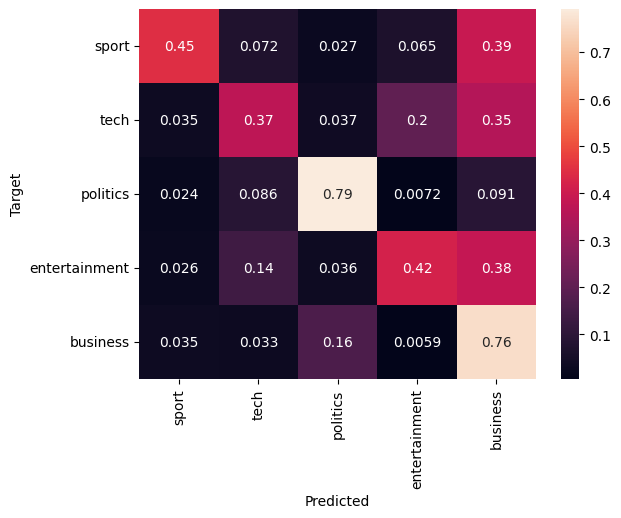

In [31]:
# helper func:
def plot_cm(cm):
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  ax = sn.heatmap(df_cm, annot=True, fmt='.2g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

# call the helper func:
plot_cm(cm)

👆Higer diagonal values, as expected🎉

In [32]:
f1_score(df['labels'], predicted_labels, average='micro')

0.5649438202247191

In [33]:
roc_auc_score(int_labels, probs, multi_class='ovo')

0.885327200963584

👆A higher ROC-AUC score indicates better discrimination performance, while a score close to 0.5 suggests that the model's performance is not significantly better than random guessing.